In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import sqlite3
import os.path
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns

# Part 1 

### Part 1: A-Check for missing values in each table: 
##### No relevant missing values were found 

In [2]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

df_team = pd.read_sql("SELECT * FROM Teams", conn)
df_salary = pd.read_sql("SELECT * FROM Salaries", conn)

# A: 
# check for missing values:
# main concern is that salaries table is missing values in salary col  or 
# teams table is missing vlaues in the wins col 

if df_team.W[df_team.W.isnull()].empty:
   print('No null win value in teams table')

if df_salary.salary[df_salary.salary.isnull()].empty:
   print('No null salary value in salary table')

No null win value in teams table
No null salary value in salary table


### Part 1: B-Join the tables and justify the join  
#### The join statement is shown below. Since we are concerened mainly about analyzing the relation between the payroll and the winning percentage which are in different tables an inner join should be used. 

In [4]:
query = "SELECT Salaries.teamID , Salaries.yearID, sum(Salaries.salary) as 'totalTeamSalary', \
((CAST(Teams.W AS FLOAT))/(CAST(Teams.G AS FLOAT))*100.0) as 'winningPercentage', Teams.franchID  \
FROM Teams, Salaries WHERE Teams.teamID=Salaries.teamID and Salaries.yearID=Teams.yearID \
GROUP BY Salaries.teamID, Salaries.yearID "
df = pd.read_sql(query, conn)
df.sample(100)

,teamID,yearID,totalTeamSalary,winningPercentage,franchID
537,COL,2004,65445167.0,41.975309,COL
243,CLE,1994,30490500.0,58.407080,CLE
202,SDN,1992,26854167.0,50.617284,SDP
652,CHA,2008,121189332.0,54.601227,CHW
49,SLN,1986,9875010.0,49.068323,STL
607,OAK,2006,62243079.0,57.407407,OAK
540,HOU,2004,75397000.0,56.790123,HOU
299,CLE,1996,48107360.0,61.490683,CLE
659,HOU,2008,88930414.0,53.416149,HOU
504,CHN,2003,79868333.0,54.320988,CHC


### Part 2: plot payrolls for all teams from (1990-2014)

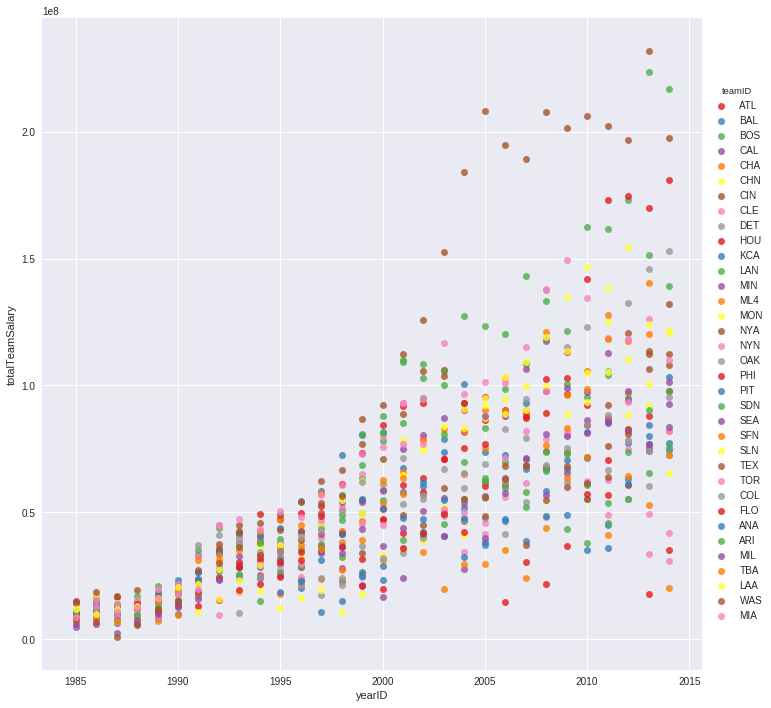

In [6]:
sns.lmplot('yearID', 'totalTeamSalary', fit_reg=False, hue='teamID', data=df, 
           size=10, palette='Set1')

### Question 2: conclusions about the plot?
#### mean payroll goes up, also range and standard deviation. Maximum salary as well. 

###  Problem 3: Justify the conclusion in question 1 with a plot 
##### Plot showing rise in mean payroll across the teams through the years. Can also show similiar plots for standard deviation. 

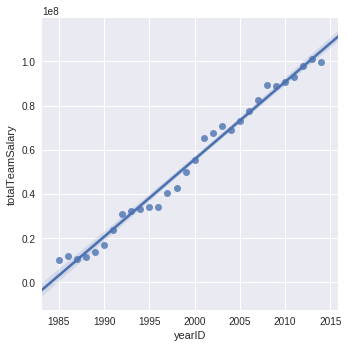

In [7]:
means = df.groupby('yearID')['totalTeamSalary'].mean()
means= means.reset_index()
sns.lmplot(x='yearID', y='totalTeamSalary', data=means)

### Problem 4: discretize into five year periods, show mean payroll vs mean winnting percentage for each team in each time period 

In [13]:
yearbins = range(1990,2016,5)
yearlabels = ["90-94", "95-99", "00-04", "05-09", "10-14"]
df['yearlabel'] = pd.cut(df['yearID'], bins=yearbins, labels=yearlabels, include_lowest=True)

df_grouped = df.groupby(['teamID', 'yearlabel'])['totalTeamSalary', 'winningPercentage'].mean()

df_grouped

df_grouped = df_grouped.reset_index()
df_grouped.sample(100)

,teamID,yearlabel,totalTeamSalary,winningPercentage
158,TBA,05-09,4.761971e+07,49.876543
66,HOU,95-99,4.236832e+07,53.950617
129,PHI,10-14,1.745809e+08,50.771605
28,CAL,05-09,NaN,NaN
35,CHN,90-94,2.863486e+07,48.232505
32,CHA,00-04,6.282140e+07,53.333333
82,LAN,00-04,9.709411e+07,52.716049
55,DET,90-94,3.089921e+07,47.856057
169,TOR,10-14,9.344630e+07,47.993827
34,CHA,10-14,1.066511e+08,46.296296


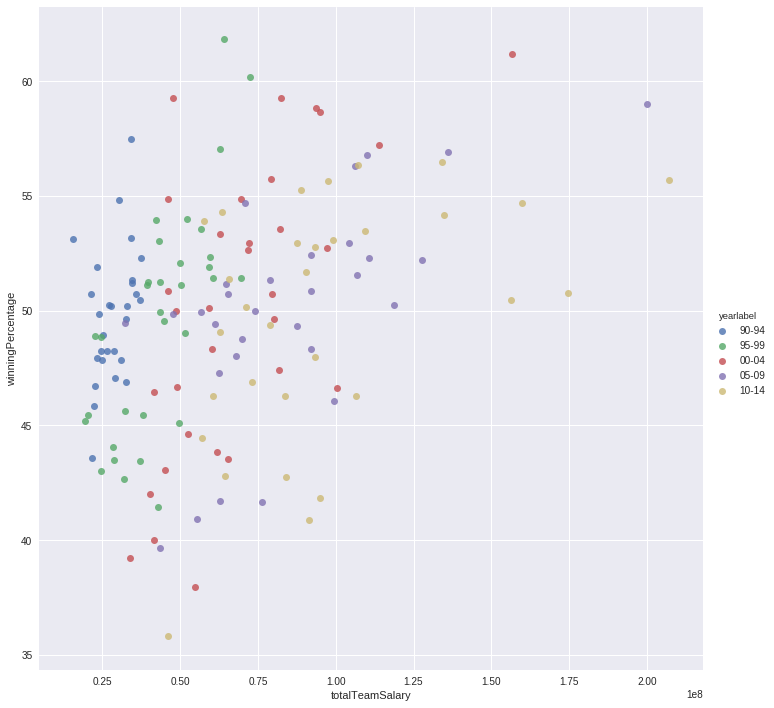

In [16]:
sns.lmplot('totalTeamSalary', 'winningPercentage', data=df_grouped, fit_reg=False, hue='yearlabel', size=10)

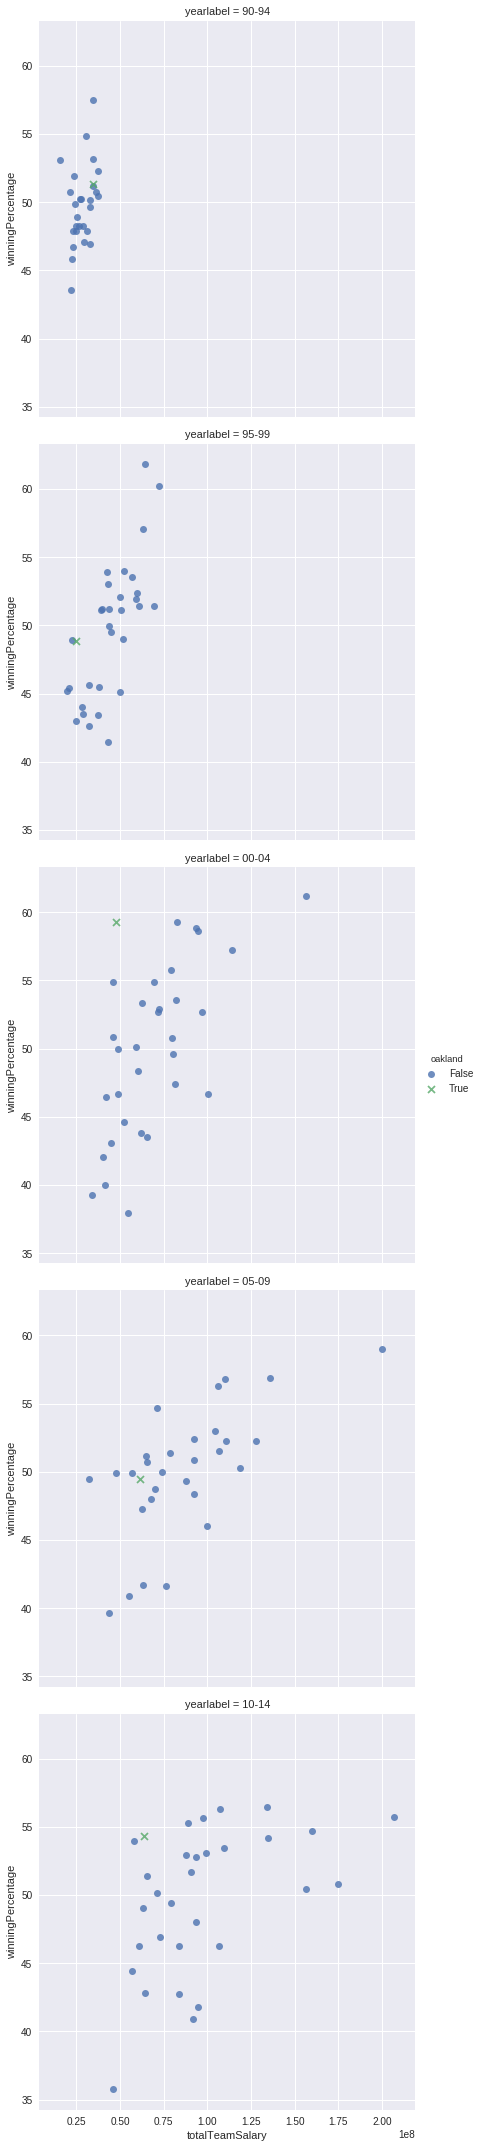

In [17]:
df_grouped['oakland'] = df_grouped['teamID'] == 'OAK'
sns.lmplot('totalTeamSalary', 'winningPercentage', data=df_grouped, hue='oakland', row='yearlabel', markers = ['o', 'x'], fit_reg=False, size=6)

### Question 2: conclusions from previous plots?
#### The regressed line has a positive slope idicating that higher payroll leads to a higher percentage win as expetced. Oakland is a clear outlier in 2000-2005 appearing at the upper left cornet (low payrolll and high winning percentage) indciating that they had high efficieny  

### Problem 5: Calculate the standard payroll 

In [18]:
avg_payroll = df.groupby('yearID')['totalTeamSalary'].mean()
std_payroll = df.groupby('yearID')['totalTeamSalary'].std()

df['std_payroll']= ""
for i, row in df.iterrows():
    std_pay = ( row['totalTeamSalary'] - avg_payroll[row['yearID']] )/ std_payroll[row['yearID']] 
    df.set_value(i, 'std_payroll', std_pay)

df['std_payroll'] = df['std_payroll'].astype(float)
df

,teamID,yearID,totalTeamSalary,winningPercentage,franchID,yearlabel,std_payroll
0,ATL,1985,14807000.0,40.740741,ATL,NaN,1.914905
1,BAL,1985,11560712.0,51.552795,BAL,NaN,0.601068
2,BOS,1985,10897560.0,49.693252,BOS,NaN,0.332678
3,CAL,1985,14427894.0,55.555556,ANA,NaN,1.761474
4,CHA,1985,9846178.0,52.147239,CHW,NaN,-0.092838
5,CHN,1985,12702917.0,47.530864,CHC,NaN,1.063341
6,CIN,1985,8359917.0,54.938272,CIN,NaN,-0.694357
7,CLE,1985,6551666.0,37.037037,CLE,NaN,-1.426192
8,DET,1985,10348143.0,52.173913,DET,NaN,0.110318
9,HOU,1985,9993051.0,51.234568,HOU,NaN,-0.033395


### Problem 6: Repeate plots of part 4 with standard payroll instead  

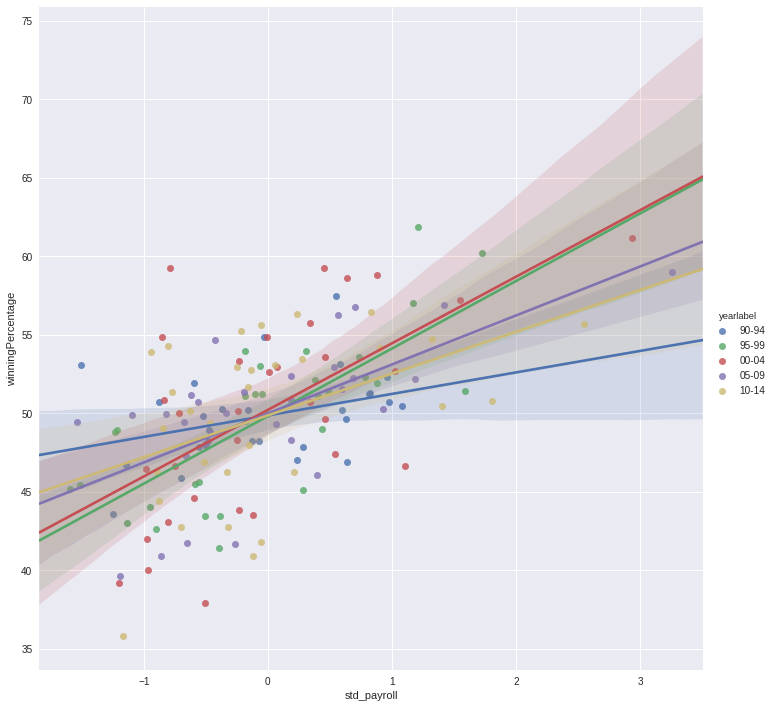

In [19]:
df_grouped = df.groupby(['teamID', 'yearlabel'])['std_payroll', 'winningPercentage'].mean()

df_grouped = df_grouped.reset_index()
df_grouped.sample()

sns.lmplot('std_payroll', 'winningPercentage', data=df_grouped, hue='yearlabel', size=10)

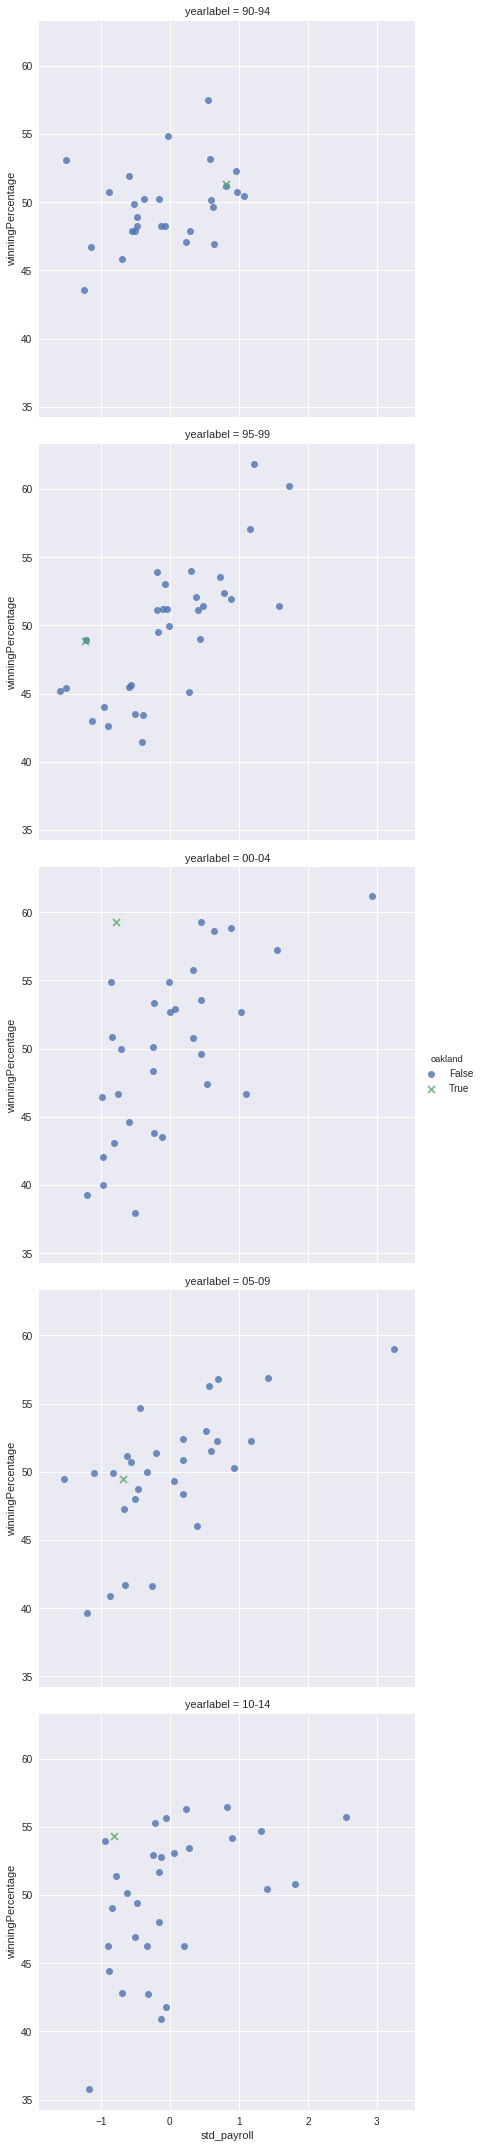

In [20]:
df_grouped['oakland'] = df_grouped['teamID'] == 'OAK'
sns.lmplot('std_payroll', 'winningPercentage', data=df_grouped, hue='oakland', row='yearlabel', markers = ['o', 'x'], fit_reg=False, size=6)

### Question 3: what is the effect of standarizing the payroll?  
#### standard payroll indicates the payroll compared to the whole sample, e.g. zero means paying average,  a value of 3 means three  standard deviations above average, negative means below average, and so on. The trend would remain the same: positive slope, i.e. higher payroll leads overall to a higher percentage win

### Problem 7:plot standard payroll vs winning percentage 

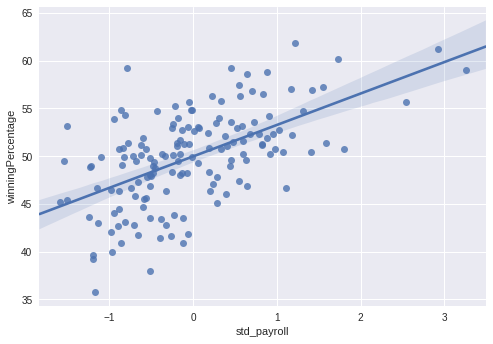

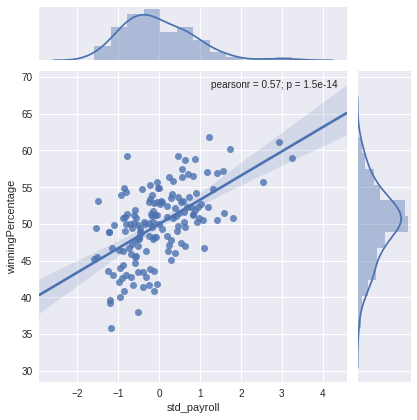

In [21]:
sns.regplot('std_payroll', 'winningPercentage', data=df_grouped)
sns.jointplot(df_grouped['std_payroll'], df_grouped['winningPercentage'], kind='reg')

In [22]:
import statsmodels.api as sm
sm.OLS(df['winningPercentage'], df['std_payroll']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      winningPercentage   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.079
Date:                Thu, 09 Nov 2017   Prob (F-statistic):              0.150
Time:                        00:23:20   Log-Likelihood:                -4580.7
No. Observations:                 858   AIC:                             9163.
Df Residuals:                     857   BIC:                             9168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
std_payroll     2.5269      1.752      1.442      0.150      -0.913       5.966
==============================================================================
Omnibus:                        2.363   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                2.311
Skew:                          -0.082   Prob(JB):                        0.315
Kurtosis:                       2.805   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem 5: Calculate the efficieny and draw year vs efficiency for (OAK, BOS, NYA, ATL, TBA)


,teamID,yearID,totalTeamSalary,winningPercentage,franchID,yearlabel,std_payroll,efficiency
0,ATL,1985,14807000.0,40.740741,ATL,NaN,1.914905,-14.046522
1,BAL,1985,11560712.0,51.552795,BAL,NaN,0.601068,0.050124
2,BOS,1985,10897560.0,49.693252,BOS,NaN,0.332678,-1.138442
3,CAL,1985,14427894.0,55.555556,ANA,NaN,1.761474,1.151872
4,CHA,1985,9846178.0,52.147239,CHW,NaN,-0.092838,2.379333
5,CHN,1985,12702917.0,47.530864,CHC,NaN,1.063341,-5.127489
6,CIN,1985,8359917.0,54.938272,CIN,NaN,-0.694357,6.674164
7,CLE,1985,6551666.0,37.037037,CLE,NaN,-1.426192,-9.397484
8,DET,1985,10348143.0,52.173913,DET,NaN,0.110318,1.898119
9,HOU,1985,9993051.0,51.234568,HOU,NaN,-0.033395,1.318056


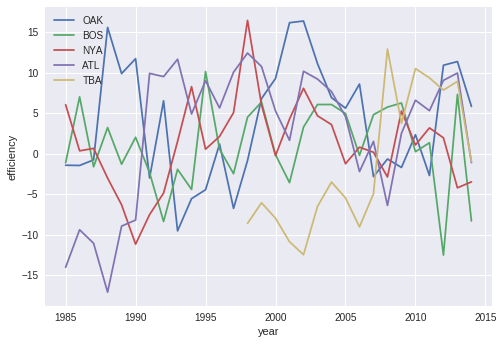

In [23]:
df['efficiency']= ""
for i, row in df.iterrows():
    exp_win = 50 + 2.5*row['std_payroll']
    eff =  row['winningPercentage'] - exp_win 
    df.set_value(i, 'efficiency', eff)

df['efficiency'] = df['efficiency'].astype(float)

selected_teams = ['OAK','BOS','NYA','ATL','TBA']

for team in selected_teams:
    x = df['yearID'][df['teamID']==team]
    y = df['efficiency'][df['teamID']==team]
    plt.plot(x ,y, label=team)

plt.xlabel("year")
plt.ylabel("efficiency")
plt.legend(loc='upper left')

df


### Question 4: What have leared from the plot in comparison to the previous plots 
#### Previous plots associated a single measure (mean of payroll or mean of standarized payroll) for a given time period. This plot is showing performance (efficiency) as a function of time. There is a clear peak in Oakland's efficency between 2000-2005 as expected.